# DAV 5300 Midterm Project-- How we rate the wine

##### By Zhihong Zhang


## Introduction## 

Wine is an alcoholic drink typically made from fermented grapes. 
Among alcohol, red wine is one of the most popular one.

Based on one of the recent statistics, The United States produced over 800 million gallons of wine in 2016, nearly 12 percent of the global wine production volume. My personal interest is that whether we can use certain quantative analysis to predict whether wine is good or not. As a result,  this research will focus on the red wine especially . Ideally, this research can create a suitable model via patterns found in the red wine data and the model can be generalized into predicting other wine quality.


## Research Questions ##

The main question I have for this research will be the correlation between different variables within wine quality. For example, can acidity of the red wine impact the quality of the wine? or is higher alcohol ratio guarantee it is a better wine. Other questions raised will also be based on this main question, and the focus is to find the main factors affecting wine quality.

After finding the pattern of the data set, I would like to validate the the model by using other data derived by my later texting mining process for beyond this class requirement( if I had extra time for this assignment).

I believe the model can be used to test the wine quality by its quantitive values. 

## Data to be Used ##
The initial data set that was used for this research comes from the  UCI repository https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/. The data set is a csv format file which can be easily loaded into Python by utilizing the pandas package.  This data set addresses some wine information, and it is used to generate the observable pattern and visualizations. 


## Approach##
The data set can be stored in a data frame by using built-in read csv function. For this data set, I plan to generate descriptive statistics for the exploratory data analysis. For example, I will generate bar charts to compare the difference between variables and quality wine. Also, multi-correlation will be checked between data attributes. After a series of procedures, I will use the regression method to create a generalized model. During this part of visualization, I plan to use seaborns and stats package.
After analyzing the pattern of the initial data set, there will be a check to determine whether or not it is a general pattern of the wine quality.  

During the validation process of data source,  if the prediction performs better than a random guess of the quality( based on the sample size distribution), it is considered to be valid.

## Part 1 Data Acquisition: ##

In [160]:
#starting point:import the library and data set
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
#reads data from the original source, since first row is column name,also add header. 
wine = pd.read_csv("https://raw.githubusercontent.com/steinszzh/DAV5300/master/Midterm/winequality-red.csv", header = None)

# data set check - make sure data was read in as expected
wine.head() 

,0
0,fixed acidity;volatile acidity;citric acid;res...
1,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
2,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
3,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
4,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...


In [161]:
wine.info 

<bound method DataFrame.info of                                                       0
0     fixed acidity;volatile acidity;citric acid;res...
1      7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
2      7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
3     7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
4     11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
...                                                 ...
1595  6.2;0.6;0.08;2;0.09;32;44;0.9949;3.45;0.58;10.5;5
1596  5.9;0.55;0.1;2.2;0.062;39;51;0.99512;3.52;0.76...
1597  6.3;0.51;0.13;2.3;0.076;29;40;0.99574;3.42;0.7...
1598  5.9;0.645;0.12;2;0.075;32;44;0.99547;3.57;0.71...
1599  6;0.31;0.47;3.6;0.067;18;42;0.99549;3.39;0.66;...

[1600 rows x 1 columns]>

Check the whole data set, we can find out that all data is in one column. To continue, we need to clear up the data first.

In [162]:
#name column first 
wine.columns = ['Mixed']
wine

,Mixed
0,fixed acidity;volatile acidity;citric acid;res...
1,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
2,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
3,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
4,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
...,...
1595,6.2;0.6;0.08;2;0.09;32;44;0.9949;3.45;0.58;10.5;5
1596,5.9;0.55;0.1;2.2;0.062;39;51;0.99512;3.52;0.76...
1597,6.3;0.51;0.13;2.3;0.076;29;40;0.99574;3.42;0.7...
1598,5.9;0.645;0.12;2;0.075;32;44;0.99547;3.57;0.71...


Before we work on the data set, we need to seperate the data.

In [163]:
#split the data set and make easy seperation
wine_df=pd.DataFrame(wine['Mixed'].str.split(';',12).tolist(),columns=['0','1','2','3','4','5','6','7','8','9','10','11'])
wine_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1595,6.2,0.6,0.08,2,0.09,32,44,0.9949,3.45,0.58,10.5,5
1596,5.9,0.55,0.1,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
1597,6.3,0.51,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11,6
1598,5.9,0.645,0.12,2,0.075,32,44,0.99547,3.57,0.71,10.2,5


Since the first row is actual column name, I need to reorganize it first.


In [164]:
#Since first row is actually the column name
#I recreate the dataframe to make the clean data.

wine_df.columns = wine_df.iloc[0]
headers = wine_df.iloc[0]
wine_df  = pd.DataFrame(wine_df.values[1:], columns=headers)
#check data
wine_df.head

<bound method NDFrame.head of 0    fixed acidity volatile acidity citric acid  ... sulphates alcohol quality
0              7.4              0.7           0  ...      0.56     9.4       5
1              7.8             0.88           0  ...      0.68     9.8       5
2              7.8             0.76        0.04  ...      0.65     9.8       5
3             11.2             0.28        0.56  ...      0.58     9.8       6
4              7.4              0.7           0  ...      0.56     9.4       5
...            ...              ...         ...  ...       ...     ...     ...
1594           6.2              0.6        0.08  ...      0.58    10.5       5
1595           5.9             0.55         0.1  ...      0.76    11.2       6
1596           6.3             0.51        0.13  ...      0.75      11       6
1597           5.9            0.645        0.12  ...      0.71    10.2       5
1598             6             0.31        0.47  ...      0.66      11       6

[1599 rows x 12 colum

### Replace column values  


In [165]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
4,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.6,0.08,2,0.09,32,44,0.9949,3.45,0.58,10.5,5
1595,5.9,0.55,0.1,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
1596,6.3,0.51,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11,6
1597,5.9,0.645,0.12,2,0.075,32,44,0.99547,3.57,0.71,10.2,5


In [166]:
#checks how many pH items are and possible change to rank low to high
wine_df.pH.unique() 

array(['3.51', '3.2', '3.26', '3.16', '3.3', '3.39', '3.36', '3.35',
       '3.28', '3.58', '3.17', '3.11', '3.38', '3.04', '3.52', '3.43',
       '3.34', '3.47', '3.46', '3.45', '3.4', '3.42', '3.23', '3.5',
       '3.33', '3.21', '3.48', '3.9', '3.25', '3.32', '3.15', '3.41',
       '3.44', '3.31', '3.54', '3.13', '2.93', '3.14', '3.75', '3.85',
       '3.29', '3.08', '3.37', '3.19', '3.07', '3.49', '3.53', '3.24',
       '3.63', '3.22', '3.68', '2.74', '3.59', '3', '3.12', '3.57',
       '3.61', '3.06', '3.6', '3.69', '3.1', '3.05', '3.67', '3.27',
       '3.18', '3.02', '3.55', '2.99', '3.01', '3.56', '3.03', '3.62',
       '2.88', '2.95', '2.98', '3.09', '2.86', '3.74', '2.92', '3.72',
       '2.87', '2.89', '2.94', '3.66', '3.71', '3.78', '3.7', '4.01',
       '2.9'], dtype=object)

In [167]:
#checks how many quality items are and possible change to rank low to high
wine_df.quality.unique() 

array(['5', '6', '7', '4', '8', '3'], dtype=object)

In [168]:
#replace column values for quality. identify 3,4 be low quality, 5 to 6 be medium and 7to8 be high quality
wine_df.quality.replace({ '3': 'low','4': 'low',
            '5': 'low','6': 'high',
             '7': 'high','8': 'high'             
                           }, inplace = True)
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,low
1,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,low
2,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,low
3,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,high
4,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,low


In [169]:
#check data type
wine_df.dtypes

0
fixed acidity           object
volatile acidity        object
citric acid             object
residual sugar          object
chlorides               object
free sulfur dioxide     object
total sulfur dioxide    object
density                 object
pH                      object
sulphates               object
alcohol                 object
quality                 object
dtype: object

Based on document of csv file, I know there is no missing data in these 12 attributes. For safe, we can check it.


In [170]:
#check whether there is null value.
wine_df.isnull().sum()

0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

After check, I am certain that there are no null values for this data set.

Before we start data analysis, I will give summaries and explainations of these attributes.
The whole dataset now contains 1599 rows and 12 attributes. Due to the complexity of this data set, by reading the paper, these attributes are as follows:

- fixed acidity	: amount of fixed acid
-	volatile acidity: amount of volatile acid
- citric acid : amount of citric acid
- alcohol	: amount of alcohol
- residual sugar: amount of residual sugar
- chlorides : amount of chlorides
- free sulfur dioxide: amount of SO2 that is not bound to other molecules.
- total sulfur dioxide:  amount of total sulfur dioxide
- density: amount of whether the post is clicked or not.

- pH: The number of level of acidity

- sulphates	: amount of sulphates
- quality: quality of the red wine.


## Part 2 Building the Model##
Before I start to build the model, I made some educational guess on selection of attributes. I choose either category or performance data to check coorelation. 
The first model I tried to work with is based on acidity information. I would like to focus on these seven attributes. 
I want to know that whether there is some significance difference with acid property or not. On the other hand, I test the modelby finding the coorelation betweeen model and the quality information.


In [171]:
#Based on assumption to create a subset of the original dataset
#gets all related attributes
acid_model = wine_df.iloc[:,[0,1,2,5,6,8,11]].copy() 
acid_model 

,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,pH,quality
0,7.4,0.7,0,11,34,3.51,low
1,7.8,0.88,0,25,67,3.2,low
2,7.8,0.76,0.04,15,54,3.26,low
3,11.2,0.28,0.56,17,60,3.16,high
4,7.4,0.7,0,11,34,3.51,low
...,...,...,...,...,...,...,...
1594,6.2,0.6,0.08,32,44,3.45,low
1595,5.9,0.55,0.1,39,51,3.52,high
1596,6.3,0.51,0.13,29,40,3.42,high
1597,5.9,0.645,0.12,32,44,3.57,low


In [172]:
#statistics
acid_model.describe()

,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,pH,quality
count,1599,1599,1599,1599,1599,1599,1599
unique,96,143,80,60,144,89,2
top,7.2,0.6,0,6,28,3.3,high
freq,67,47,132,138,43,57,855


For this acid model, we can have general view on it. Comapred with my earlier trials of categorized quality (low, medium and high) current two side 

Second model is inspired by the belief that alcohol and other compound such as sugar can contributes to its quality.
Therefore this model only contains these following attributes. 

In [173]:
#Based on assumption to create a subset of the original dataset
#gets all
sugar_model = wine_df.iloc[:,[3,4,7,10,11]].copy() 
sugar_model

,residual sugar,chlorides,density,alcohol,quality
0,1.9,0.076,0.9978,9.4,low
1,2.6,0.098,0.9968,9.8,low
2,2.3,0.092,0.997,9.8,low
3,1.9,0.075,0.998,9.8,high
4,1.9,0.076,0.9978,9.4,low
...,...,...,...,...,...
1594,2,0.09,0.9949,10.5,low
1595,2.2,0.062,0.99512,11.2,high
1596,2.3,0.076,0.99574,11,high
1597,2,0.075,0.99547,10.2,low


Before EDA, I added some more categorical column in model 1 - acid model to make it more meaningful.

After running code, it is noticable that there is an error associated with strings because the number in the dataframe was treated as the string instead of numbers. So I convert string to number to continue the calculation.

In [0]:
# Based on error, convert to numerical
acid_model['total sulfur dioxide']=pd.to_numeric(acid_model['total sulfur dioxide'])
acid_model['free sulfur dioxide']=pd.to_numeric(acid_model['free sulfur dioxide'])
acid_model['citric acid']=pd.to_numeric(acid_model['citric acid'])
acid_model['pH']=pd.to_numeric(acid_model['pH'])

In [175]:
acid_model['freesulf_rate']=acid_model['free sulfur dioxide'] / acid_model['total sulfur dioxide'] 
acid_model

,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,pH,quality,freesulf_rate
0,7.4,0.7,0.00,11.0,34.0,3.51,low,0.323529
1,7.8,0.88,0.00,25.0,67.0,3.20,low,0.373134
2,7.8,0.76,0.04,15.0,54.0,3.26,low,0.277778
3,11.2,0.28,0.56,17.0,60.0,3.16,high,0.283333
4,7.4,0.7,0.00,11.0,34.0,3.51,low,0.323529
...,...,...,...,...,...,...,...,...
1594,6.2,0.6,0.08,32.0,44.0,3.45,low,0.727273
1595,5.9,0.55,0.10,39.0,51.0,3.52,high,0.764706
1596,6.3,0.51,0.13,29.0,40.0,3.42,high,0.725000
1597,5.9,0.645,0.12,32.0,44.0,3.57,low,0.727273


In [176]:

#function for categorize
def func(x):
    '''this function tries to categorize the numerical value 
     '''
    if x < 0.1:
        return 'few'
    else: return 'some'
acid_model['citricacid_amount'] = acid_model['citric acid'].apply(func)
acid_model

,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,pH,quality,freesulf_rate,citricacid_amount
0,7.4,0.7,0.00,11.0,34.0,3.51,low,0.323529,few
1,7.8,0.88,0.00,25.0,67.0,3.20,low,0.373134,few
2,7.8,0.76,0.04,15.0,54.0,3.26,low,0.277778,few
3,11.2,0.28,0.56,17.0,60.0,3.16,high,0.283333,some
4,7.4,0.7,0.00,11.0,34.0,3.51,low,0.323529,few
...,...,...,...,...,...,...,...,...,...
1594,6.2,0.6,0.08,32.0,44.0,3.45,low,0.727273,few
1595,5.9,0.55,0.10,39.0,51.0,3.52,high,0.764706,some
1596,6.3,0.51,0.13,29.0,40.0,3.42,high,0.725000,some
1597,5.9,0.645,0.12,32.0,44.0,3.57,low,0.727273,some


In [177]:

#function for categorize sulf level
def sulfrate(x):
    '''this function tries to categorize the numerical value 
     '''
    if x < 0.3:
        return 'low'
    else: return 'high'
acid_model['freesulflevel'] = acid_model['freesulf_rate'].apply(sulfrate)
acid_model

,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,pH,quality,freesulf_rate,citricacid_amount,freesulflevel
0,7.4,0.7,0.00,11.0,34.0,3.51,low,0.323529,few,high
1,7.8,0.88,0.00,25.0,67.0,3.20,low,0.373134,few,high
2,7.8,0.76,0.04,15.0,54.0,3.26,low,0.277778,few,low
3,11.2,0.28,0.56,17.0,60.0,3.16,high,0.283333,some,low
4,7.4,0.7,0.00,11.0,34.0,3.51,low,0.323529,few,high
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.6,0.08,32.0,44.0,3.45,low,0.727273,few,high
1595,5.9,0.55,0.10,39.0,51.0,3.52,high,0.764706,some,high
1596,6.3,0.51,0.13,29.0,40.0,3.42,high,0.725000,some,high
1597,5.9,0.645,0.12,32.0,44.0,3.57,low,0.727273,some,high


In [178]:

#function for categorize ph value
def PHrate(x):
    '''this function tries to categorize the numerical value 
     '''
    if x < 3.3:
        return 'low'
    elif 3.3 < x < 3.8:
        return 'medium'
    return 'high'
acid_model['PHlevel'] = acid_model['pH'].apply(PHrate)
acid_model

,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,pH,quality,freesulf_rate,citricacid_amount,freesulflevel,PHlevel
0,7.4,0.7,0.00,11.0,34.0,3.51,low,0.323529,few,high,medium
1,7.8,0.88,0.00,25.0,67.0,3.20,low,0.373134,few,high,low
2,7.8,0.76,0.04,15.0,54.0,3.26,low,0.277778,few,low,low
3,11.2,0.28,0.56,17.0,60.0,3.16,high,0.283333,some,low,low
4,7.4,0.7,0.00,11.0,34.0,3.51,low,0.323529,few,high,medium
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.6,0.08,32.0,44.0,3.45,low,0.727273,few,high,medium
1595,5.9,0.55,0.10,39.0,51.0,3.52,high,0.764706,some,high,medium
1596,6.3,0.51,0.13,29.0,40.0,3.42,high,0.725000,some,high,medium
1597,5.9,0.645,0.12,32.0,44.0,3.57,low,0.727273,some,high,medium


Based on one article I read, volatile acid is believe to be bad to the wine, therefore I also will test that to make an categorical term for it.

In [0]:
acid_model['volatile acidity']=pd.to_numeric(acid_model['volatile acidity']) 

In [180]:
#function for categorize volatile acidity
def varate(x):
    '''this function tries to categorize the numerical value 
     '''
    if x < .3:
        return 'weak'
    elif .3 < x < .6:
        return 'medium'
    return 'strong'
acid_model['vola_acid_level'] = acid_model['volatile acidity'].apply(varate)
acid_model

,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,pH,quality,freesulf_rate,citricacid_amount,freesulflevel,PHlevel,vola_acid_level
0,7.4,0.700,0.00,11.0,34.0,3.51,low,0.323529,few,high,medium,strong
1,7.8,0.880,0.00,25.0,67.0,3.20,low,0.373134,few,high,low,strong
2,7.8,0.760,0.04,15.0,54.0,3.26,low,0.277778,few,low,low,strong
3,11.2,0.280,0.56,17.0,60.0,3.16,high,0.283333,some,low,low,weak
4,7.4,0.700,0.00,11.0,34.0,3.51,low,0.323529,few,high,medium,strong
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,32.0,44.0,3.45,low,0.727273,few,high,medium,strong
1595,5.9,0.550,0.10,39.0,51.0,3.52,high,0.764706,some,high,medium,medium
1596,6.3,0.510,0.13,29.0,40.0,3.42,high,0.725000,some,high,medium,medium
1597,5.9,0.645,0.12,32.0,44.0,3.57,low,0.727273,some,high,medium,strong


## Part 3: Exploratory Data Analysis (EDA) ##
To explore the data, I firstly need to make sure how dimensions are distributed in the data set.  We still need to check the data ratio fist.

In [181]:
acid_model_qt = acid_model.groupby(['quality']).size().to_frame('Count') #counts distribution of quality  
acid_model_qt

,Count
quality,
high,855
low,744


Wine quality is about equal size , and it was well distributed. it is about 53.5% to get high quality wine by random selection.


In [182]:
acid_model_ca = acid_model.groupby(['citricacid_amount']).size().to_frame('Count') #counts distribution of quality  
acid_model_ca

,Count
citricacid_amount,
few,403
some,1196


In [183]:
#counts distribution of model 
acid_model_ph = acid_model.groupby(['PHlevel']).size().to_frame('Count') 
acid_model_ph

,Count
PHlevel,
high,62
low,726
medium,811


In [184]:
#create a dataframe to calculate count of model byfew citriacid
acid_model_cm =acid_model.groupby(['citricacid_amount','quality'],as_index=False)['PHlevel'].count()
acid_model_cm.rename(columns={'PHlevel':'Count'},inplace=True)
acid_model_cm

,citricacid_amount,quality,Count
0,few,high,194
1,few,low,209
2,some,high,661
3,some,low,535


In [185]:
#create a dataframe for ph level
acid_model_phlevel =acid_model.groupby(['PHlevel','quality'],as_index=False)['citricacid_amount'].count()
acid_model_phlevel.rename(columns={'citricacid_amount':'Count'},inplace=True)
acid_model_phlevel

,PHlevel,quality,Count
0,high,high,35
1,high,low,27
2,low,high,382
3,low,low,344
4,medium,high,438
5,medium,low,373


In [186]:
#create a dataframe  
acid_model_freesulflevel =acid_model.groupby(['freesulflevel','quality'],as_index=False)['citricacid_amount'].count()
acid_model_freesulflevel.rename(columns={'citricacid_amount':'Count'},inplace=True)
acid_model_freesulflevel

,freesulflevel,quality,Count
0,high,high,653
1,high,low,427
2,low,high,202
3,low,low,317


In [187]:
#create a dataframe  
acid_model_vola_acid_level =acid_model.groupby(['vola_acid_level','quality'],as_index=False)['citricacid_amount'].count()
acid_model_vola_acid_level.rename(columns={'citricacid_amount':'Count'},inplace=True)
acid_model_vola_acid_level

,vola_acid_level,quality,Count
0,medium,high,541
1,medium,low,364
2,strong,high,207
3,strong,low,360
4,weak,high,107
5,weak,low,20


Based on these results,then we run code to create four graph

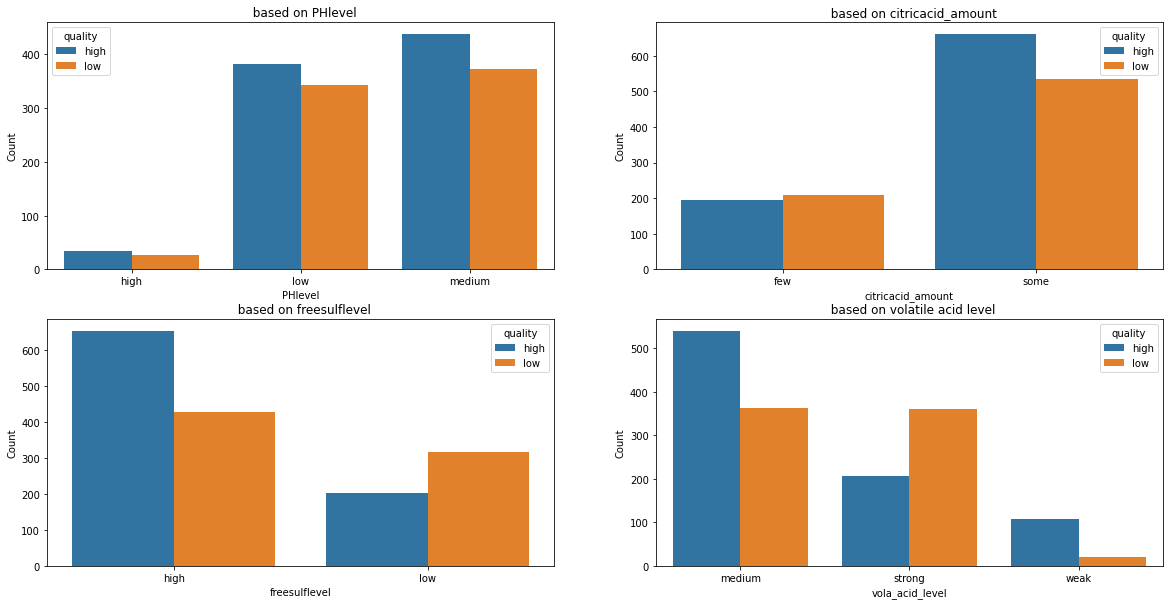

In [188]:
#plot all four attributes based on edibility
# define a new figure for plotting
plt.figure(figsize=(20,10))


#plot Category Distribution

plt.subplot(221)
#plot bar chart
sns.barplot(x='PHlevel',y='Count',hue='quality',data=acid_model_phlevel);

# give the plot a title
plt.title('  based on PHlevel');


#plot Type Distribution
plt.subplot(222)
#plot bar chart
sns.barplot(x='citricacid_amount',y='Count',hue='quality',data=acid_model_cm);

# give the plot a title
plt.title('  based on citricacid_amount');


plt.subplot(223)
#plot bar chart
sns.barplot(x='freesulflevel',y='Count',hue='quality',data=acid_model_freesulflevel);

# give the plot a title
plt.title('  based on freesulflevel');

plt.subplot(224)
#plot bar chart
sns.barplot(x='vola_acid_level',y='Count',hue='quality',data=acid_model_vola_acid_level);

# give the plot a title
plt.title('  based on volatile acid level');




### Some insights and findings based on the plots:###
Just take a general look of the pattern of the data, we can see certain patterns based on graph.


- Ph level is not a good indicator, there is barely the difference, although by ratio, with low or medium Ph level( it means it is more acidity, there is more higher quality wine by ratio.

- citricacid amount is a fine indicator. it is obviously with some level of citric acid help to predict it is more likely to be good wine. Since with few citric acid, it is almost equal likely to be good or bad wine.


- free sulfur level is a good indicator, since we already know sample size of good and bad wine is about the same.By random chance, with higher free sulfur level, it is 40% chance to get a higher quality wine compared with bad one. Similarly, for a low free sulfur level, it is also definite higher chance to get a bad quality wine by random choice.


- Volatile acid is a good indicator. As the article[reference 2] declared, volatile acid does make wine to be bad. with a weak volatile acid level, the chance of getting good quality wine is much higher than the low quality wine. 



## Part 4: Statistical Test ##

Although previous Exploratory Data Analysis gave some insights on the possible correlation on these categorical attributes. we still use some statistical method to test it. 
We use the Chi-square distribution for categorical attributes.
ALong with previous ploteed graph, I also emphasize on these attributes, citric acid amount, phlevel, free sulfur level and volatile acid level.
Chisquare test is used to test any of these attributes with wine quality.

## For acid model

In [0]:
import pandas as pd
from scipy.stats import chi2_contingency,iqr
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn_pandas import DataFrameMapper
import statsmodels.api as sm


%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

I cleaned data frame to focus on these four attributes only with chisqure test.

In [190]:
acid_model

,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,pH,quality,freesulf_rate,citricacid_amount,freesulflevel,PHlevel,vola_acid_level
0,7.4,0.700,0.00,11.0,34.0,3.51,low,0.323529,few,high,medium,strong
1,7.8,0.880,0.00,25.0,67.0,3.20,low,0.373134,few,high,low,strong
2,7.8,0.760,0.04,15.0,54.0,3.26,low,0.277778,few,low,low,strong
3,11.2,0.280,0.56,17.0,60.0,3.16,high,0.283333,some,low,low,weak
4,7.4,0.700,0.00,11.0,34.0,3.51,low,0.323529,few,high,medium,strong
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,32.0,44.0,3.45,low,0.727273,few,high,medium,strong
1595,5.9,0.550,0.10,39.0,51.0,3.52,high,0.764706,some,high,medium,medium
1596,6.3,0.510,0.13,29.0,40.0,3.42,high,0.725000,some,high,medium,medium
1597,5.9,0.645,0.12,32.0,44.0,3.57,low,0.727273,some,high,medium,strong


In [191]:
#build for chisquare test
chi2_model= acid_model.iloc[:,[6, 8, 9,10,11]].copy()
chi2_model

,quality,citricacid_amount,freesulflevel,PHlevel,vola_acid_level
0,low,few,high,medium,strong
1,low,few,high,low,strong
2,low,few,low,low,strong
3,high,some,low,low,weak
4,low,few,high,medium,strong
...,...,...,...,...,...
1594,low,few,high,medium,strong
1595,high,some,high,medium,medium
1596,high,some,high,medium,medium
1597,low,some,high,medium,strong


## Chi-square

In [192]:
# for citricacid amount
citricacid_contingency_table = chi2_model.groupby(["citricacid_amount","quality"]).size().unstack(level=-1)
citricacid_contingency_table.sort_values("high",inplace=True)
citricacid_contingency_table

quality,high,low
citricacid_amount,,
few,194,209
some,661,535


In [193]:
chi2_stat, p_val, dof, ex = chi2_contingency(citricacid_contingency_table)
print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")
print("===Contingency Table===")
print(ex)

===Chi2 Stat===
5.873597077349592


===Degrees of Freedom===
1


===P-Value===
0.015369615726027292


===Contingency Table===
[[215.48780488 187.51219512]
 [639.51219512 556.48780488]]


pvalue is very small. Then for citric acid amount

In [194]:
# for freesulflevel	
freesulflevel_contingency_table = chi2_model.groupby(["freesulflevel","quality"]).size().unstack(level=-1)
freesulflevel_contingency_table.sort_values("high",inplace=True)
freesulflevel_contingency_table

quality,high,low
freesulflevel,,
low,202,317
high,653,427


In [195]:
chi2_stat2, p_val2, dof2, ex2 = chi2_contingency(freesulflevel_contingency_table)
print("===Chi2 Stat===")
print(chi2_stat2)
print("\n")
print("===Degrees of Freedom===")
print(dof2)
print("\n")
print("===P-Value===")
print(p_val2)
print("\n")
print("===Contingency Table===")
print(ex2)

===Chi2 Stat===
64.52094229497678


===Degrees of Freedom===
1


===P-Value===
9.551176127103047e-16


===Contingency Table===
[[277.51407129 241.48592871]
 [577.48592871 502.51407129]]


For PHlevel

In [196]:
# for PHlevel	
PHlevel_contingency_table = chi2_model.groupby(["PHlevel","quality"]).size().unstack(level=-1)
PHlevel_contingency_table.sort_values("high",inplace=True)
PHlevel_contingency_table

quality,high,low
PHlevel,,
high,35,27
low,382,344
medium,438,373


In [197]:
chi2_stat3, p_val3, dof3, ex3 = chi2_contingency(PHlevel_contingency_table)
print("===Chi2 Stat===")
print(chi2_stat3)
print("\n")
print("===Degrees of Freedom===")
print(dof3)
print("\n")
print("===P-Value===")
print(p_val3)
print("\n")
print("===Contingency Table===")
print(ex3)

===Chi2 Stat===
0.5279598282176623


===Degrees of Freedom===
2


===P-Value===
0.7679889652445621


===Contingency Table===
[[ 33.15196998  28.84803002]
 [388.1988743  337.8011257 ]
 [433.64915572 377.35084428]]


ph level's p value is high and we are cerain that it is not stitsitcally significant. we can accept null hypothesis. There is no coorelation between ph level and wine quality.

In [198]:
# for vola_acid_level	
vola_acid_level_contingency_table = chi2_model.groupby(["vola_acid_level","quality"]).size().unstack(level=-1)
vola_acid_level_contingency_table.sort_values("high",inplace=True)
vola_acid_level_contingency_table

quality,high,low
vola_acid_level,,
weak,107,20
strong,207,360
medium,541,364


In [199]:
chi2_stat4, p_val4, dof4, ex4 = chi2_contingency(vola_acid_level_contingency_table)
print("===Chi2 Stat===")
print(chi2_stat4)
print("\n")
print("===Degrees of Freedom===")
print(dof4)
print("\n")
print("===P-Value===")
print(p_val4)
print("\n")
print("===Contingency Table===")
print(ex4)

===Chi2 Stat===
128.41519973619876


===Degrees of Freedom===
2


===P-Value===
1.3031478175651971e-28


===Contingency Table===
[[ 67.90806754  59.09193246]
 [303.18011257 263.81988743]
 [483.91181989 421.08818011]]


we also get a small pvalue. we cannot accept the null hypothesis. There is cerain correlation between these two variables.

### Issues and worries along with usage of Chi-square testing###
- Because of how the Chi-Square value is calculated, it is extremely sensitive to sample size – when the sample size is too large (~500), almost any small difference will appear statistically significant. In our 1599 sample case, we are almost guaranteed to have some statistically significant.



Then I continue to work on this acid model. This time I choose 80 % data to train the model and 20% for testing. The logistical model will be employeed for this model.

### add dummy variable for acid model ###

In [200]:
#make a copy for the selected data

prediction= chi2_model.iloc[:,[0,1,2,4]].copy()
#replaces Edibility values to 1 if it is 'high'quality and 0 for bad quality
prediction.quality.replace('high', 1, inplace = True)
prediction.quality.replace('low', 0, inplace = True)
prediction

,quality,citricacid_amount,freesulflevel,vola_acid_level
0,0,few,high,strong
1,0,few,high,strong
2,0,few,low,strong
3,1,some,low,weak
4,0,few,high,strong
...,...,...,...,...
1594,0,few,high,strong
1595,1,some,high,medium
1596,1,some,high,medium
1597,0,some,high,strong


In [201]:
#creates dummy variables for the predictor variables
prediction_dummies = pd.get_dummies(prediction)
prediction_dummies.head()

,quality,citricacid_amount_few,citricacid_amount_some,freesulflevel_high,freesulflevel_low,vola_acid_level_medium,vola_acid_level_strong,vola_acid_level_weak
0,0,1,0,1,0,0,1,0
1,0,1,0,1,0,0,1,0
2,0,1,0,0,1,0,1,0
3,1,0,1,0,1,0,0,1
4,0,1,0,1,0,0,1,0


#### build logistic regression for acid model

In [0]:
#model required library
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [203]:
#model for citricacid_amount only
ca_model= [ 'citricacid_amount_few', 'citricacid_amount_some'    ]
X = prediction_dummies[ca_model].values
y = prediction_dummies['quality'].values

#use 80% data to train
#has a fixed state number 22 to make sure result is fixed , 22 is my lucky number 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

#define the model type as logistic regression
model = LogisticRegression()

#train the algorithm
model.fit(X_train, y_train)



# calculate the accuracy of the model relative to the training data set
model.score(X_train, y_train)

0.544175136825645

In [204]:
# vola_acid_level model
va_model= [ 'vola_acid_level_medium' , 'vola_acid_level_strong'  , 'vola_acid_level_weak'  
                 ]
X1 = prediction_dummies[va_model].values
y1 = prediction_dummies['quality'].values

#use 80% data to train
#has a fixed state number 22 to make sure result is fixed , 22 is my lucky number 
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=22)


#define the model type as logistic regression
model1 = LogisticRegression()

#train the algorithm
model1.fit(X1_train, y1_train)

# calculate the accuracy of the model relative to the training data set
model1.score(X1_train, y1_train)


0.6247068021892104

In [205]:
# completed mixed model
complete_model= [ 'vola_acid_level_medium' , 'vola_acid_level_strong'  , 'vola_acid_level_weak',
                  'citricacid_amount_few', 'citricacid_amount_some',
                  'freesulflevel_high','freesulflevel_low'
                 ]
                 			
X2 = prediction_dummies[complete_model].values
y2 = prediction_dummies['quality'].values

#use 80% data to train
#has a fixed state number 22 to make sure result is fixed , 22 is my lucky number 
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=22)


#define the model type as logistic regression
model2 = LogisticRegression()

#train the algorithm
model2.fit(X2_train, y2_train)

# calculate the accuracy of the model relative to the training data set
model2.score(X2_train, y2_train)


0.6489444878811571

### Some insights and findings based on the plots:###
- In this model, vola_acid level is a good enough indicator and it can predict 62.4% by itself only, adding two more variables only helps a bit. It raised from 62.4% to 64.89% .
- In general, the final complete model based on these acid related information can predict 64.8% accurate on the quality of the wine, it is better than random guess of 53.5% which is based on good/bad quality wine distribution.



Based on my understanding of the model, it is trying to recognize the high quality wine by giving attributes. 
According to the total amount of high quality wine in the dataset, random guess is that 53% chance to get right on high quality wine. The raised concerns are that this model is actually computing the chance of getting low quality wine.

As far as there is some obvious change on the performance based on the change of the attributes,I would say that there is certain pattern between variables (in this acid model, the acid related attributes) and wine quality. Regardless of whether the performance of recognizing is increased or decreased, both results can serve my goals on qualify the difference on different attributes and wine quality.


However, based on the result I got, the model still serves its purpose. model make recognization better or worse .
It proves that there is certain pattern between wine quality and associated attributes.  

Somehow due to the timing manner, I had some troubles for a better categorizer for wine quality.

## Conclusion


By answering the research question and explore various properties of data, in my opinion, this research still finishs its original goal. There is certain pattern and correlation between some variables and wine quality.

In addition, other physical attributes of the wine can also be used to find what kind of attributes will yield better accuracy. Due to time manner , I did not focus on other models except models associated with acidity. 


This time, somehow I could not finish other sugar or alcohol based model along with a hybrid model to predict the wine quality.
I believe further work based on this project can be used to predict better results.

## Reference##
1 link: https://www.statista.com/topics/1541/wine-market/


2 C.-D Patz, A Blieke, R Ristow, H Dietrich,
Application of FT-MIR spectrometry in wine analysis,
Analytica Chimica Acta,
Volume 513, Issue 1,
2004,Pages 81-89,
ISSN 0003-2670,
https://doi.org/10.1016/j.aca.2004.02.051.
(http://www.sciencedirect.com/science/article/pii/S000326700400251X)

3 link: https://winefolly.com/deep-dive/weird-wine-flavors-and-the-science-behind-them/